In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
alphas = list(np.linspace(2.9, 4, num=10000))
x_0s = [0.9, 0.7]
iteration_numbers = [2000]

d = {
    "alphas": alphas,
    "x_0s": x_0s,
    "iteration_numbers": iteration_numbers,
}
with open('input.json', 'w') as outfile:
    json.dump(d, outfile)

In [3]:
# !g++ --std=c++20  main.cpp -o main
subprocess.call(["./main", "input.json"])
f = open("data.json")
data = json.load(f)

In [4]:
# fig, ax = plt.subplots(len(alphas), len(x_0s), figsize=(15, 6 * len(alphas)))
alphas = []
x_0s = []
iteration_numbers = []

for i, (alpha, data_1) in enumerate(data.items()):
    alphas.append(alpha)
    for j, (x_0, data_2) in enumerate(data_1.items()):
        x_0s.append(x_0)
        for iteration_number, data_3 in data_2.items():
            iteration_numbers.append(iteration_number)
#             ax[i][j].plot(np.arange(0, int(iteration_number) + 1), np.array(data_3))
#             ax[i][j].set_title(f"alpha = {alpha},    x_0 = {x_0}")
#             ax[i][j].set_xlabel("iterations")
#             ax[i][j].set_ylabel("x")
            

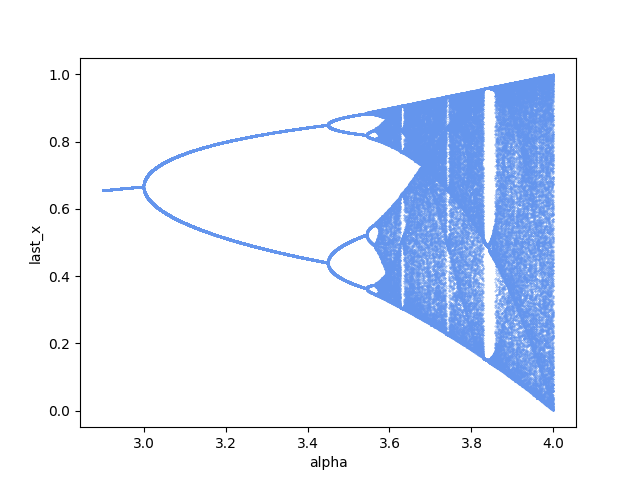

In [5]:
%matplotlib widget
last_x = []
l = 20
for alpha in alphas:
    last_x.append(data[alpha][x_0s[0]][iteration_numbers[0]][-l:])
last_x = np.array(last_x)
plt.figure()
for i in range(l):
    plt.scatter(list(map(float, alphas)), last_x[:, i], s=0.1, color="cornflowerblue")
plt.xlabel("alpha")
plt.ylabel("last_x")
plt.savefig('plot.png', dpi=300, bbox_inches='tight')